# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

Se proponen dos objetivos: 
1. Predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.
2. Predecir el volúmen de precipitaciones (columna *Rainfall* del dia siguiente), en función al *Rainfall* del dia actual


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. Todos los puntos analizarlos para los dos problemas planteados.
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Para cada uno de los problemas propuestos, defina una lista de modelos candidatos a entrenar. Justifique sus elecciones. 

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
pd.set_option("display.max_columns", None)

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Partición de train-test set
from sklearn.model_selection import train_test_split


### 1. Análisis exploratorio inicial

In [4]:
weather_aus_df = pd.read_csv('data/weatherAUS.csv', parse_dates=['Date'])
weather_aus_df.shape

(145460, 23)

In [5]:
weather_aus_df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [6]:
weather_aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [7]:
weather_aus_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


This dataset contains about 10 years of daily weather observations from many locations across Australia.

Date: The date of observation
Location: The common name of the location of the weather station
RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
WindDir3pm: Direction of the wind at 3pm
WindDir9am: Direction of the wind at 9am
WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight

MinTemp: The minimum temperature in degrees celsius
MaxTemp: The maximum temperature in degrees celsius
Rainfall: The amount of rainfall recorded for the day in mm
Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine: The number of hours of bright sunshine in the day.
WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3am
Humidity9am: Humidity (percent) at 9am
Humidity3pm: Humidity (percent) at 3pm
Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast
Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am: Temperature (degrees C) at 9am
Temp3pm: Temperature (degrees C) at 3pm

RainTomorrow: The target variable. Did it rain tomorrow? (1 = yes, 0 = no )


#### variables numericas

In [37]:
print('Columnas con variables numéricas')
numeric_df = weather_aus_df.select_dtypes(exclude=['category', object]).columns
numeric_df.values


Columnas con variables numéricas


array(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], dtype=object)

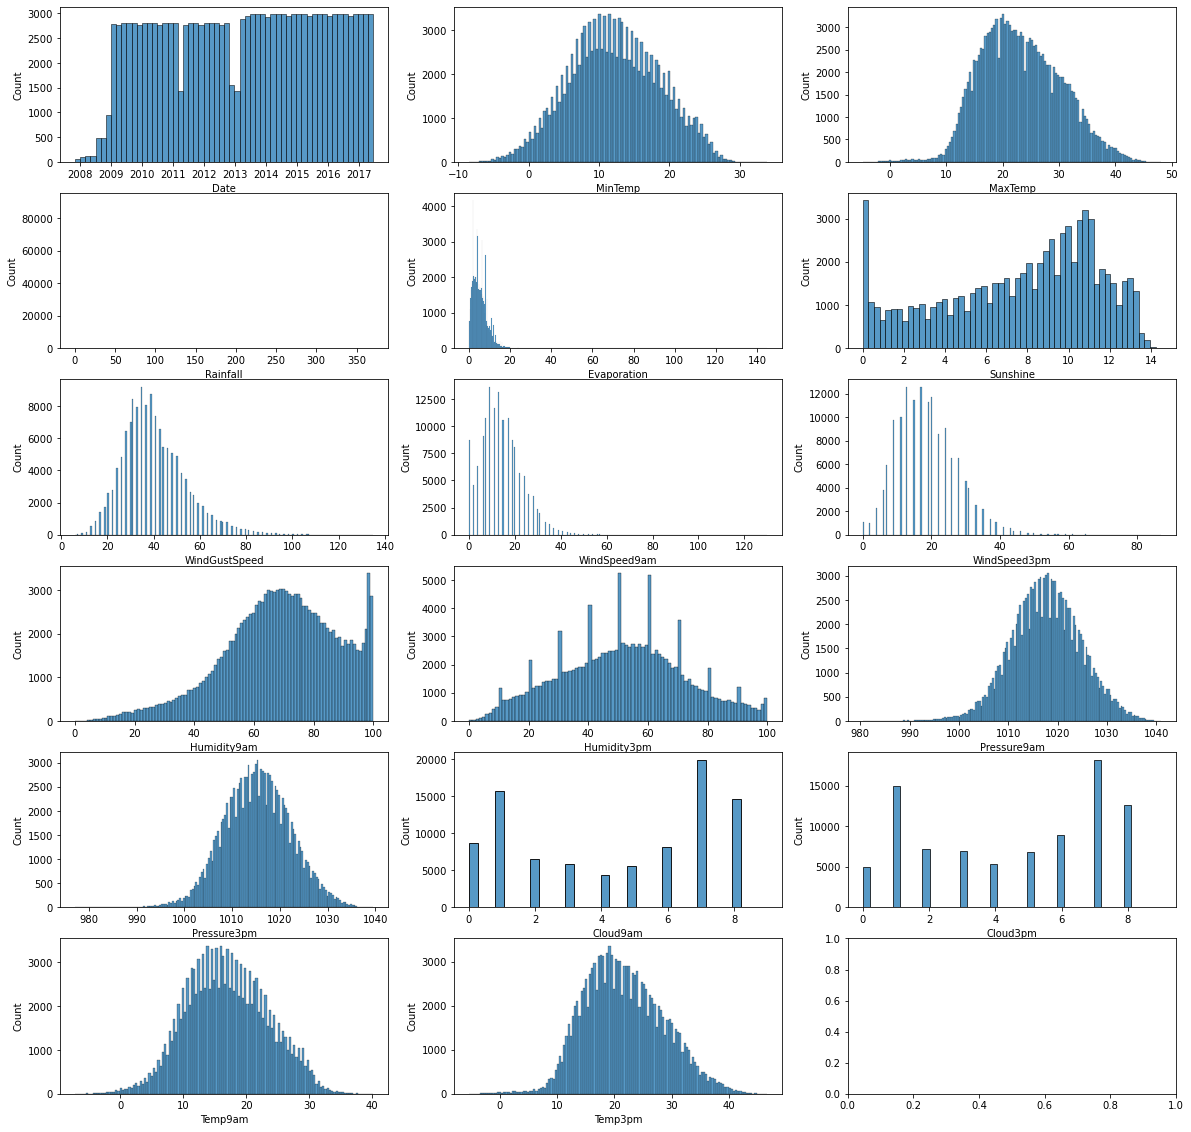

In [38]:
def distributionPlots(df, numeric_columns):
    fig, axes =plt.subplots(6,3, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            sns.histplot(data = df, x = numeric_columns[i], ax=ax)
            i+=1

distributionPlots(weather_aus_df, numeric_df.values)

Cloud3pm y Cloud9am son v.a discretas medidas en ‘Octa’, https://es.wikipedia.org/wiki/Octa

WindGustSpeed, WindSpeed9am y WindSpeed3pm son v.a continuas

'Rainfall' no se aprecia su distribución

In [244]:
def distributionPlotsWithHue(df, numeric_columns):
    fig, axes =plt.subplots(6,3, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            sns.histplot(data = df, x = numeric_columns[i], hue='RainTomorrow', ax=ax)
            i+=1

#distributionPlotsWithHue(weather_aus_df, numeric_df.values)


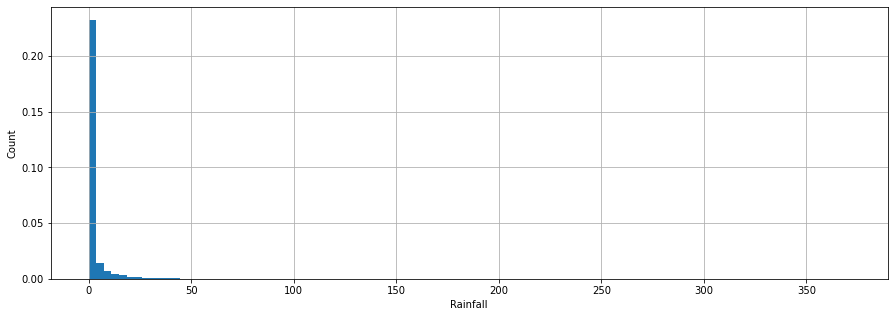

In [35]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
axes.hist(weather_aus_df['Rainfall'], bins=100, density=True)
axes.set_xlabel('Rainfall')
axes.set_ylabel('Count')
axes.grid(which='Both')

Rainfall
Podríamos intuir que posee muchos outliers

<AxesSubplot:ylabel='Rainfall'>

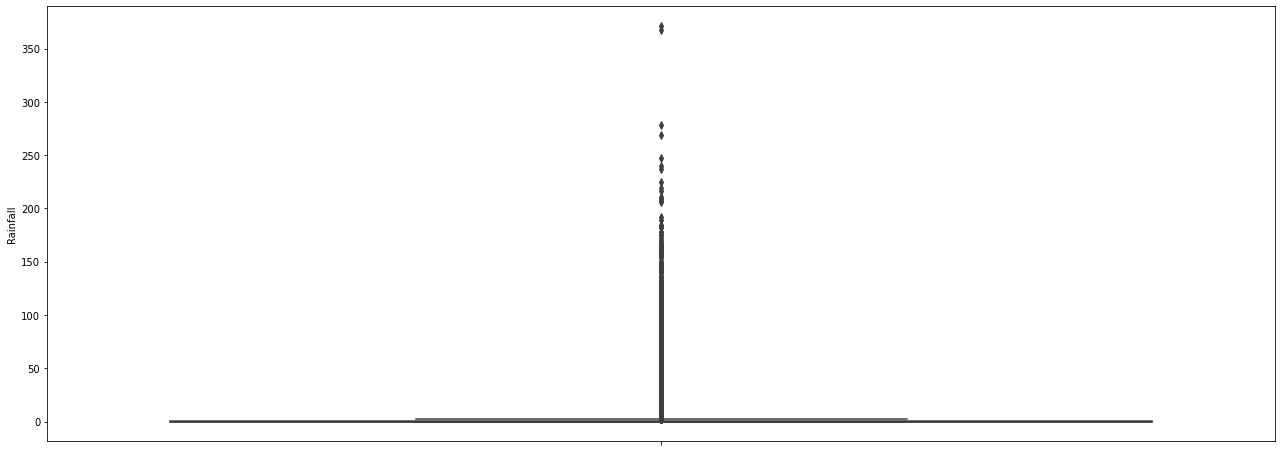

In [12]:
fig,axes = plt.subplots(1,1,figsize=(22,8))
sns.boxplot(y="Rainfall",
            data=weather_aus_df, ax=axes)

#### variables categoricas

In [41]:
print('Columnas con variables categóricas')
categorical_df = weather_aus_df.select_dtypes(include=['category', object]).columns
categorical_df.values

Columnas con variables categóricas


array(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

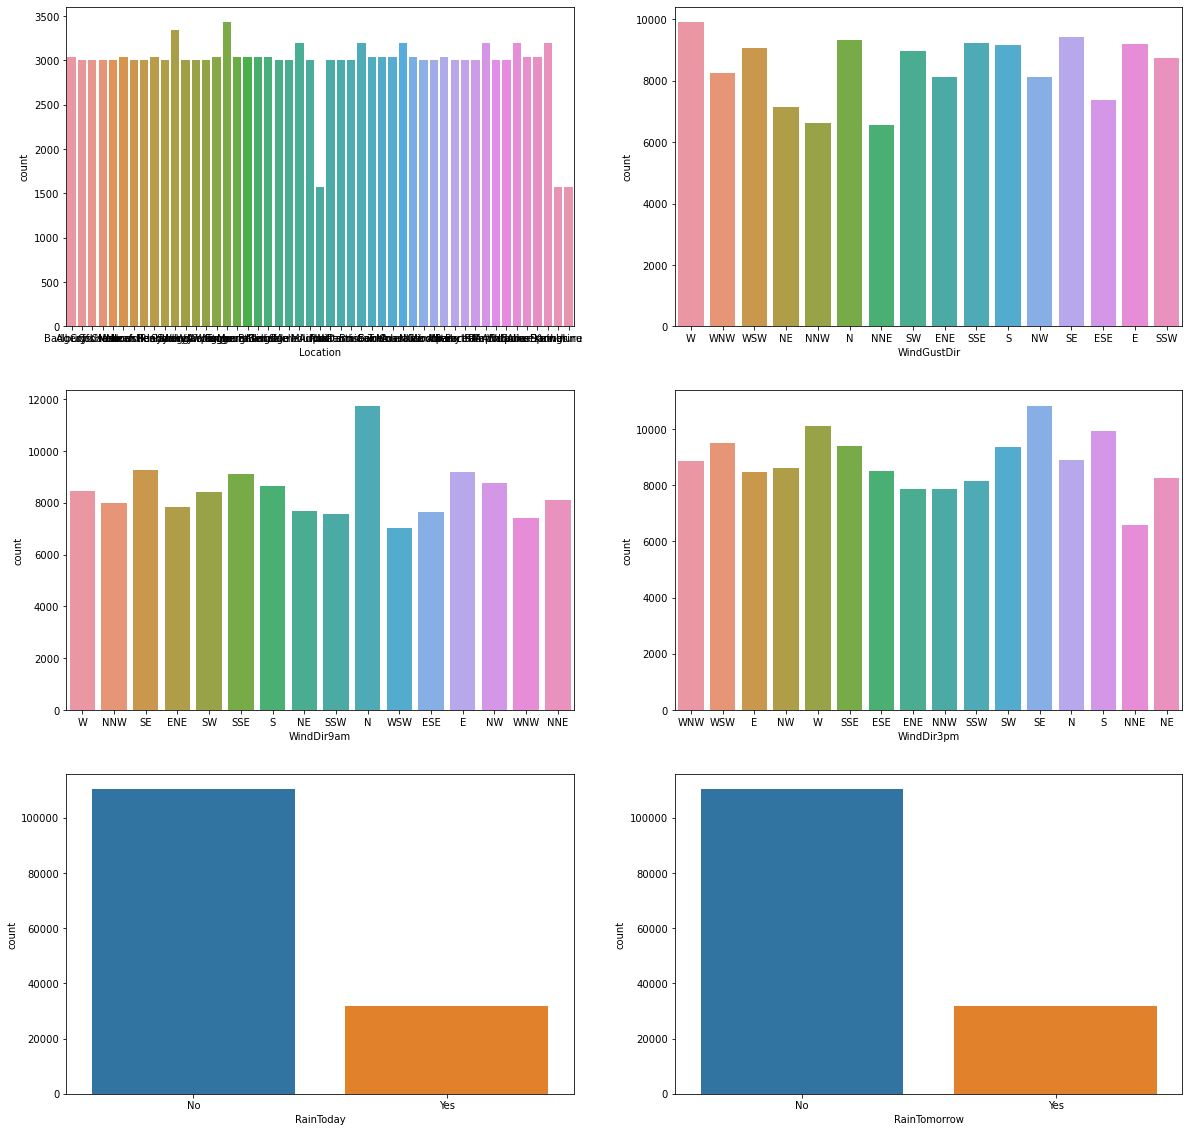

In [42]:
def countPlots(df, column_names):
    fig, axes =plt.subplots(3,2, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(column_names):
            sns.countplot(x = column_names[i],
                   data = df, ax=ax)
            i+=1

countPlots(weather_aus_df, categorical_df.values)

In [373]:
def countPlotsWithHue(df, column_names):
    fig, axes =plt.subplots(3,2, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(column_names):
            sns.countplot(x = column_names[i], hue='RainTomorrow',
                   data = df, ax=ax)
            i+=1

#countPlotsWithHue(weather_aus_df, categorical_df.values)

#### Valores unicos/cardinalidad

In [26]:
for i in categorical_df.values:
    print(i, weather_aus_df[i].unique(), len(weather_aus_df[i].unique()))

Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 49
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW'] 17
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE'] 17
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE'] 17
RainToday ['No' 'Yes' nan] 3
RainTomorrow ['No' 'Yes' nan] 3


#### Consideracion de trabajar con variables categóricas
Notamos que tenemos alta cardinalidad en las variables categoricas, buscaremos metodos de encodificacion que ayude a reducirlo

#### Variable de salida

In [11]:
weather_aus_df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

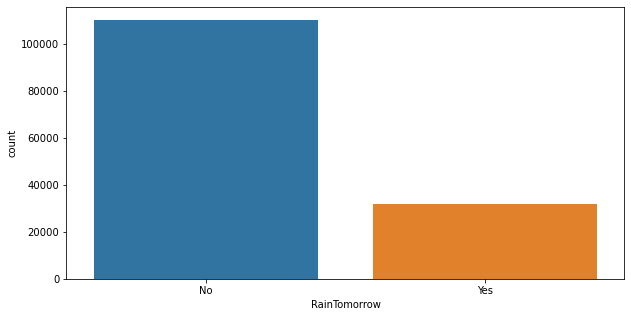

In [74]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
                   data = weather_aus_df, ax=axes)

¿Qué técnicas consideraría para codificar la variable de salida?
Como trabajaremos con una clasificación binaria entonces la forma de encodificar la variable de salida es simple, usamos 1 para Yes y 0 para No.

¿Están balanceadas las clases?
Las clases de la variable de salida están desbalanceadas, buscaremos un método para mejorar eso.

### 2. Esquema de validación de resultados

In [409]:

train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(weather_aus_df.drop(columns=['RainTomorrow']), weather_aus_df['RainTomorrow'], test_size=test_ratio)
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (116368, 22) (116368,)
Test: (29092, 22) (29092,)


#### Revisar las distribuciones en train y test que sean parecidas

In [154]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,115207.000000,115379.000000,113786.000000,66203.000000,60617.000000,108142.000000,114949.000000,113939.000000,114282.000000,112822.000000,104318.000000,104353.000000,71757.000000,68940.000000,114976.000000,113529.000000
mean,12.182928,23.220510,2.356297,5.464770,7.618896,40.004143,14.042280,18.643309,68.866077,51.484134,1017.674684,1015.283385,4.438703,4.503815,16.982574,21.683936
std,6.397810,7.123988,8.435647,4.198935,3.782376,13.577149,8.899997,8.798189,19.017709,20.780835,7.098619,7.026788,2.887275,2.720788,6.491007,6.940014
min,-8.200000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.000000,-5.100000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,367.600000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [155]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,28768.000000,28820.000000,28413.000000,16467.000000,15008.000000,27055.000000,28744.000000,28459.000000,28524.000000,28131.000000,26077.000000,26079.000000,17815.000000,17162.000000,28717.000000,28322.000000
mean,12.238512,23.224705,2.379425,5.482146,7.580004,40.159490,14.048010,18.740117,68.939945,51.759625,1017.550953,1015.145867,4.482739,4.534495,17.022892,21.681202
std,6.401154,7.099362,8.645951,4.172705,3.797974,13.725529,8.976766,8.855867,19.075213,20.855130,7.137369,7.078841,2.886503,2.718566,6.479732,6.923275
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,0.000000,982.200000,978.200000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.400000,16.700000
50%,12.100000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.800000,21.100000
75%,16.900000,28.300000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.600000,26.500000
max,31.400000,47.300000,371.000000,72.200000,14.300000,135.000000,87.000000,76.000000,100.000000,100.000000,1040.900000,1038.900000,8.000000,8.000000,39.100000,46.100000


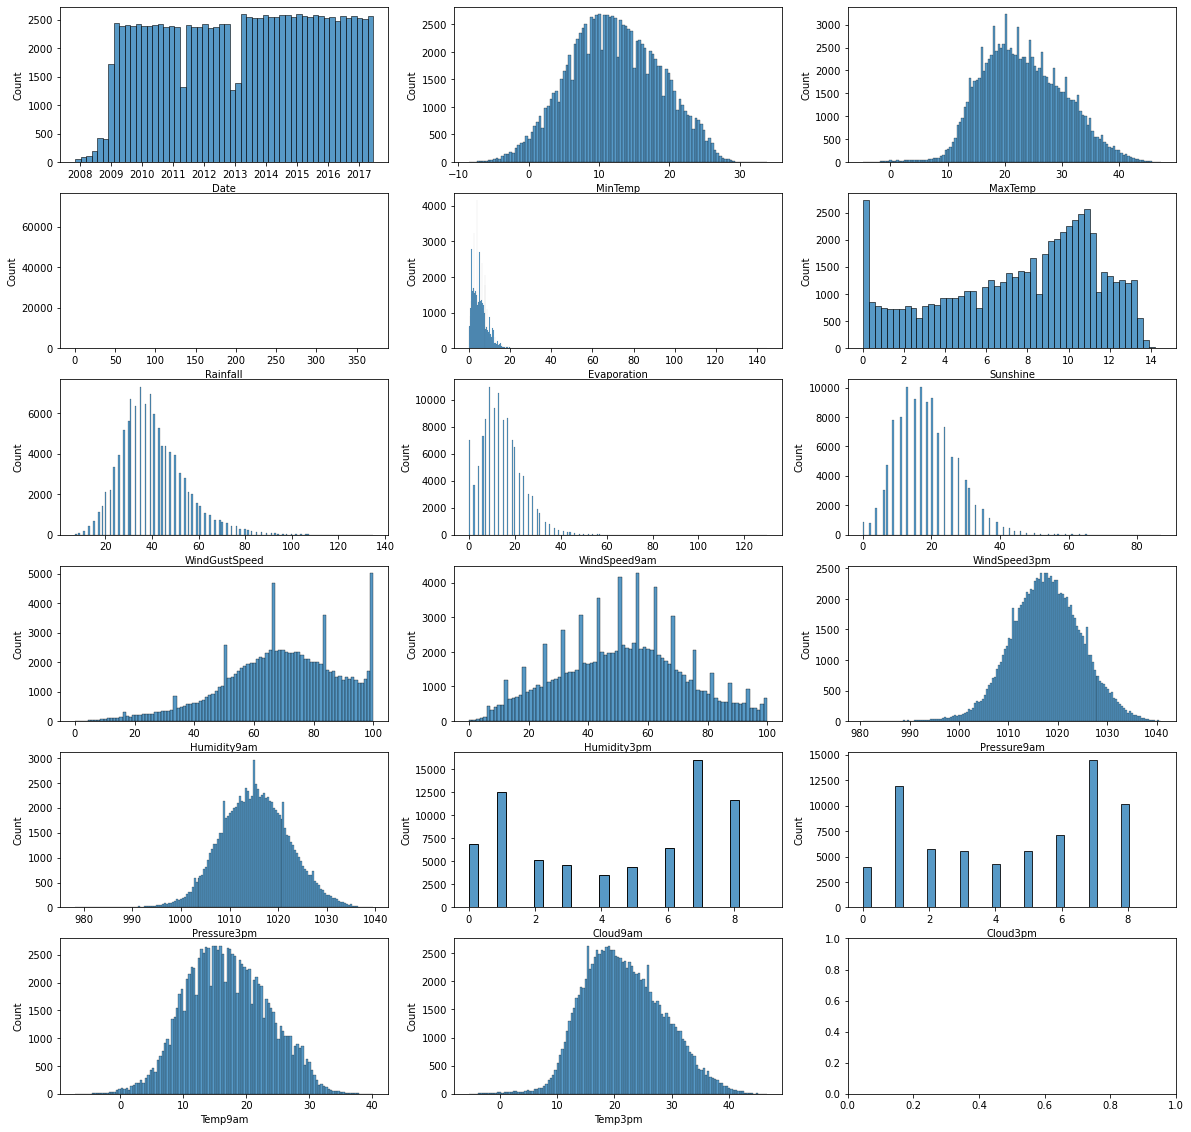

In [44]:
distributionPlots(X_train, X_train.select_dtypes(exclude=['category', object]).columns.values)

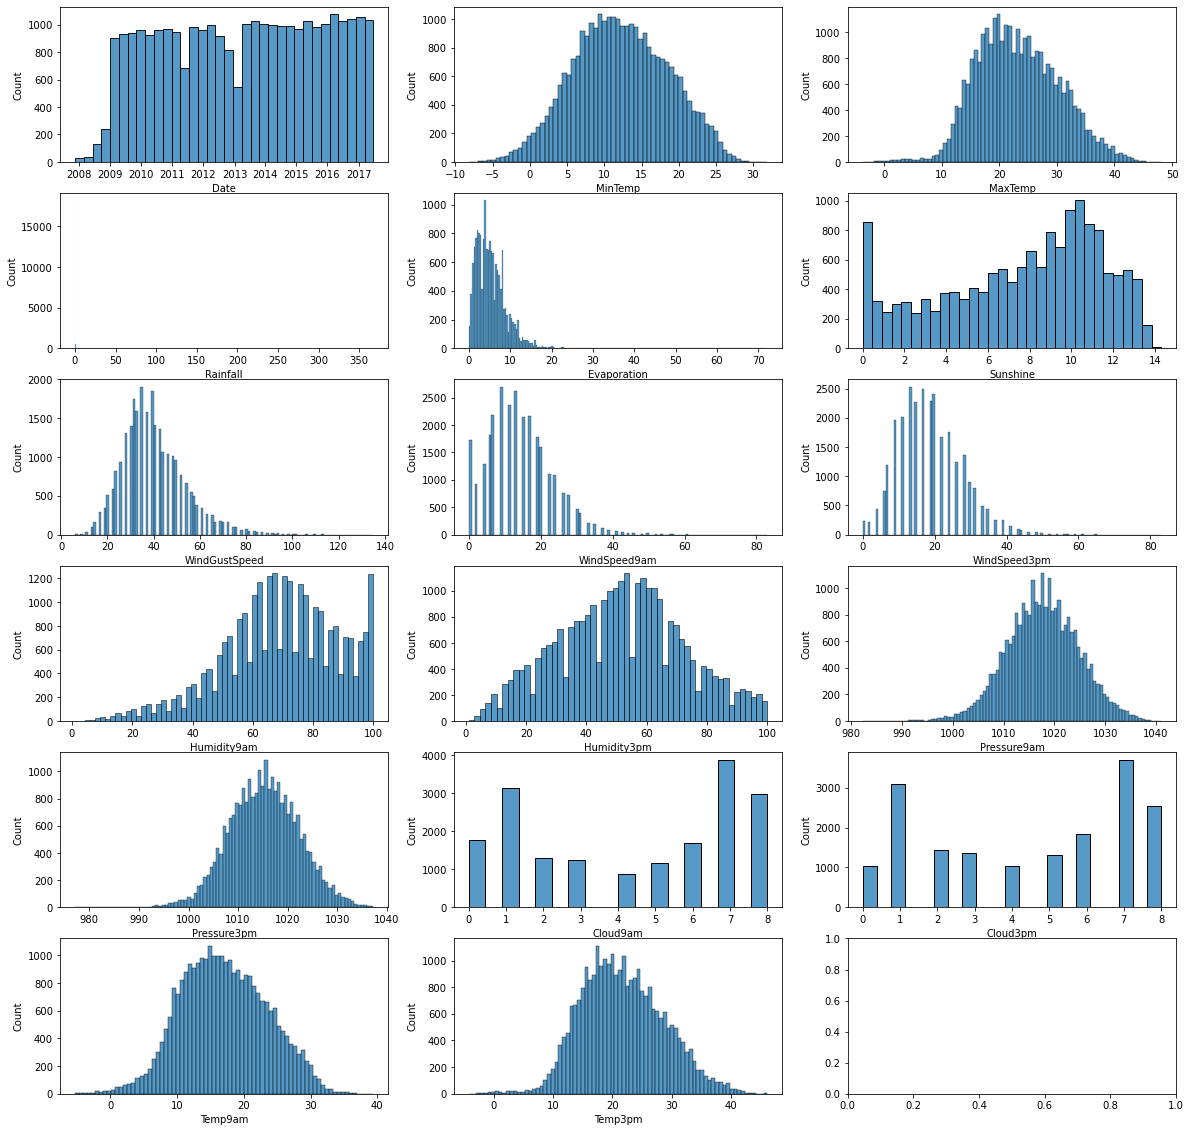

In [45]:
distributionPlots(X_test, X_test.select_dtypes(exclude=['category', object]).columns.values)


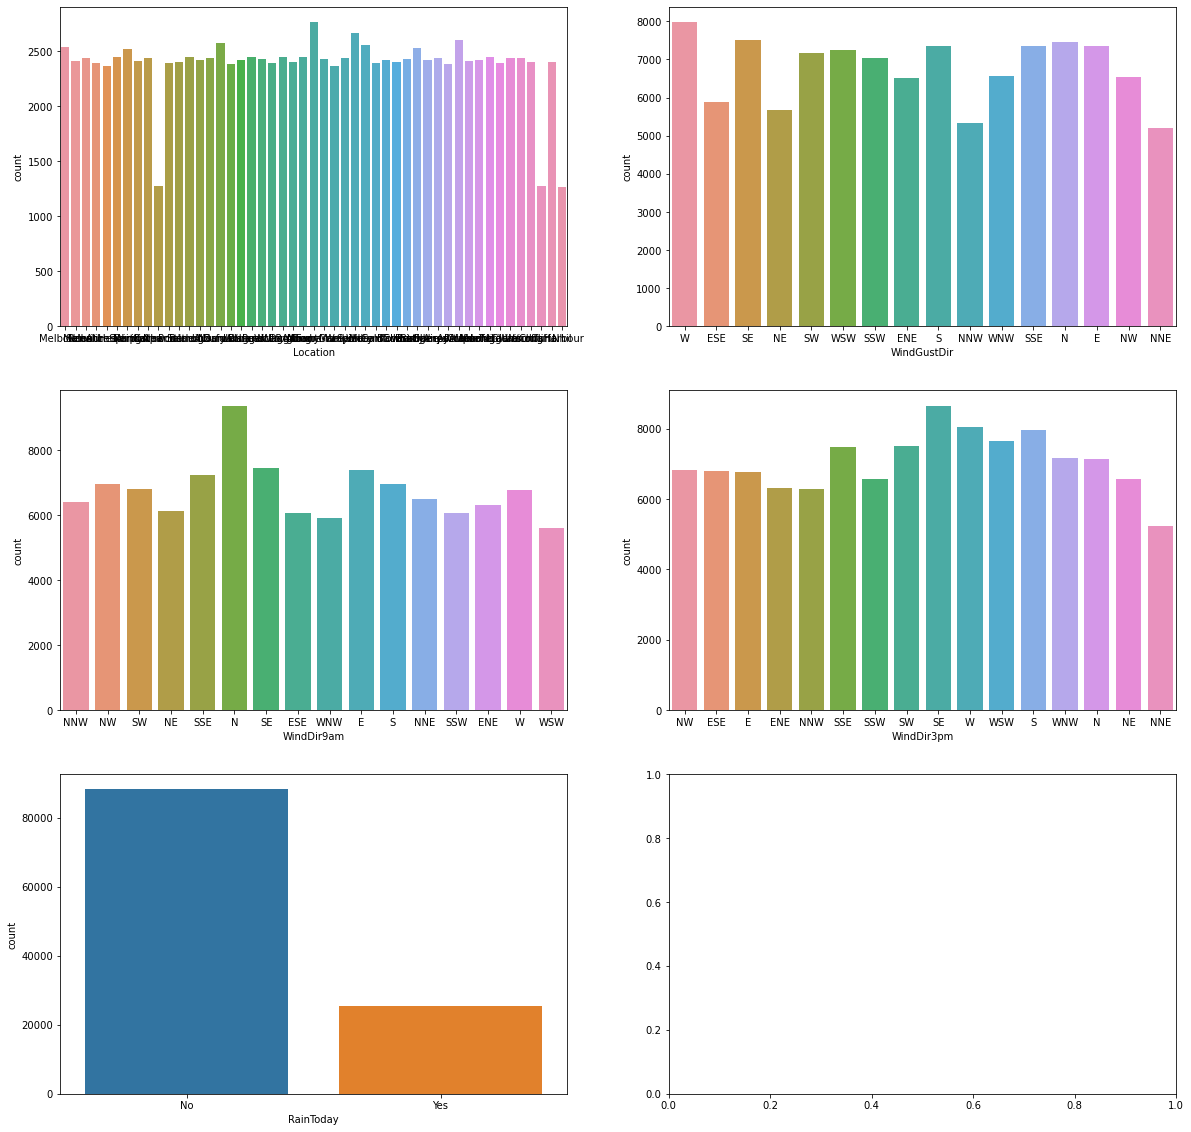

In [46]:
countPlots(X_train, X_train.select_dtypes(include=['category', object]).columns.values)

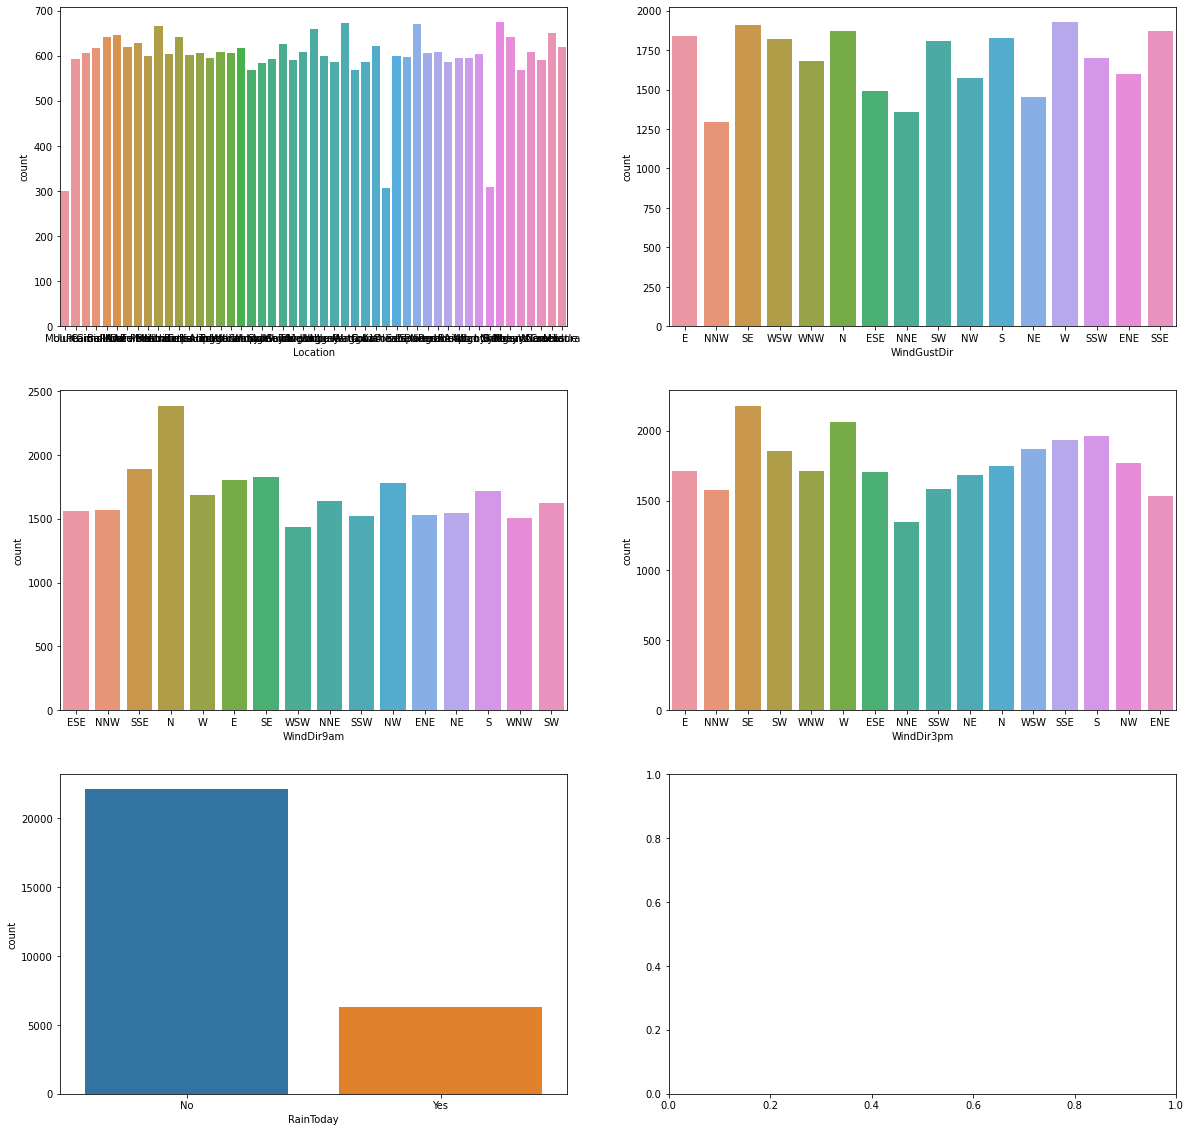

In [47]:
countPlots(X_test, X_test.select_dtypes(include=['category', object]).columns.values)

In [410]:
for column in weather_aus_df.select_dtypes(include=['category', object]).columns.values:
    if column != 'RainTomorrow':
        print('categórica {}, labels in train:{}, labels in test:{}'.format(column, len(X_train.dropna()[column].unique()), len(X_test.dropna()[column].unique())))

categórica Location, labels in train:26, labels in test:26
categórica WindGustDir, labels in train:16, labels in test:16
categórica WindDir9am, labels in train:16, labels in test:16
categórica WindDir3pm, labels in train:16, labels in test:16
categórica RainToday, labels in train:2, labels in test:2


#### Revisar distribución de variable de salida


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

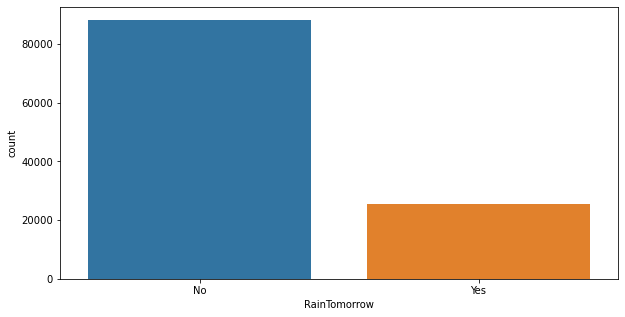

In [411]:

fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_train.to_frame(), ax=axes)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

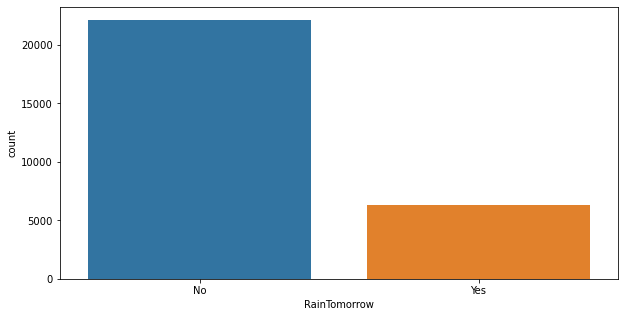

In [412]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_test.to_frame(), ax=axes)

#### Porcentaje Valores faltantes en Train y Test

In [413]:
count_nulls = pd.concat([X_train, y_train], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_train) * 100

Sunshine         47.984841
Evaporation      43.118383
Cloud3pm         40.705349
Cloud9am         38.306064
Pressure9am      10.375705
Pressure3pm      10.359377
WindDir9am        7.205589
WindGustDir       7.076688
WindGustSpeed     7.039736
Humidity3pm       3.080744
WindDir3pm        2.911453
Temp3pm           2.480923
Rainfall          2.227416
RainToday         2.227416
RainTomorrow      2.218823
WindSpeed3pm      2.102812
Humidity9am       1.793448
WindSpeed9am      1.211673
Temp9am           1.203080
MinTemp           1.028633
MaxTemp           0.878248
Location          0.000000
Date              0.000000
dtype: float64

In [204]:
count_nulls = pd.concat([X_test, y_test], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_test) * 100

Sunshine         47.569779
Evaporation      42.688712
Cloud3pm         40.588478
Cloud9am         38.055135
Pressure9am      10.215867
Pressure3pm      10.178056
WindDir9am        7.180668
WindGustDir       7.077547
WindGustSpeed     7.015674
Humidity3pm       3.014574
WindDir3pm        2.890829
Temp3pm           2.454283
Rainfall          2.162106
RainToday         2.162106
RainTomorrow      2.117421
WindSpeed3pm      2.103671
Humidity9am       1.780558
WindSpeed9am      1.230579
Temp9am           1.196205
MinTemp           1.000275
MaxTemp           0.855905
Location          0.000000
Date              0.000000
dtype: float64

En general las distribuciones de las variables numéricas y categóricas se mantienen en train y test, la variable de salida tambien mantiene similar distribución

### 3. Limpieza y preparación de datos / ingeniería de features

#### Imputacion de Valores faltantes

In [414]:
train_df = pd.concat([X_train, y_train], axis=1)
count_nulls = train_df.isnull().sum().sort_values(ascending=False)
print("# columnas con datos faltantes: ", len(count_nulls[count_nulls > 0]))
print('Porcentaje de datos faltantes x Columna: ')
count_nulls/len(train_df) * 100

# columnas con datos faltantes:  21
Porcentaje de datos faltantes x Columna: 


Sunshine         47.984841
Evaporation      43.118383
Cloud3pm         40.705349
Cloud9am         38.306064
Pressure9am      10.375705
Pressure3pm      10.359377
WindDir9am        7.205589
WindGustDir       7.076688
WindGustSpeed     7.039736
Humidity3pm       3.080744
WindDir3pm        2.911453
Temp3pm           2.480923
Rainfall          2.227416
RainToday         2.227416
RainTomorrow      2.218823
WindSpeed3pm      2.102812
Humidity9am       1.793448
WindSpeed9am      1.211673
Temp9am           1.203080
MinTemp           1.028633
MaxTemp           0.878248
Location          0.000000
Date              0.000000
dtype: float64

In [206]:
df1 = train_df[train_df.isnull().any(axis=1)]
print("filas con al menos 1 NaN (%) ", len(df1)/len(train_df) * 100)

filas con al menos 1 NaN (%)  61.287467344974566


Alrededor del 61% de las filas cuentan con al menos 1 dato faltante, no podemos simplemente eliminarlas, analizamos la imputación de variables para cada columna.


#### Imputación de 'Sunshine'
Posee muchos valores faltantes (48%). Se elimina la columna porque imputarlo alterará mucho su distribución.

#### Imputación de 'Evaporation'
Posee muchos valores faltantes (43%). Se elimina la columna porque imputarlo alterará mucho su distribución.

#### Imputación de Cloud3pm y Cloud9am
drop Cloud3pm y Cloud9am, 40% y 38% de datos faltantes. Se elimina la columna porque imputarlo alterará mucho su distribución.

In [415]:
train_df = train_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

#### Imputación de Rainfall, RainToday y RainTomorrow

In [416]:
train_df['Rainfall'].isnull().sum()

2592

In [417]:
# nulos en 'Rainfall' y 'RainToday' en la misma fila
len(train_df[train_df['Rainfall'].isnull() & train_df['RainToday'].isnull()])

2592

Como Rainfall está relacionado con RainToday, podemos ver que ambos tienen nulos al mismo tiempo. Como la cantidad de nulos es 2.24% podemos simplemente eliminar las filas con datos faltantes.

In [418]:
train_df = train_df.dropna(subset=['Rainfall', 'RainToday'])

También eliminamos los nulos de 'RainTomorrow' porque son menor al 5%

In [420]:
train_df = train_df.dropna(subset=['RainTomorrow'])

#### Remover filas con nulos menor al 5%

In [421]:
train_df = train_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

#### Imputación de WindGustDir y WindDir9am (categóricas)
imputación por categoría más frecuente

In [423]:
moda_WindGustDir = train_df['WindGustDir'].value_counts().index[0]
moda_WindDir9am = train_df['WindDir9am'].value_counts().index[0]
print(moda_WindGustDir, moda_WindDir9am)

W N


In [424]:
train_df.loc[:, 'WindGustDir_imputed'] = train_df['WindGustDir'].isnull().astype(int)
train_df.loc[:, 'WindDir9am_imputed'] = train_df['WindDir9am'].isnull().astype(int)
train_df['WindGustDir'] = train_df['WindGustDir'].fillna(moda_WindGustDir)
train_df['WindDir9am'] = train_df['WindDir9am'].fillna(moda_WindDir9am)

#### Imputación de WindGustSpeed
imputación por la mediana

In [426]:
median_WindGustSpeed = train_df['WindGustSpeed'].median()
print(median_WindGustSpeed)

39.0


In [427]:
train_df.loc[:, 'WindGustSpeed_imputed'] = train_df['WindGustSpeed'].isnull().astype(int)
train_df['WindGustSpeed'] = train_df['WindGustSpeed'].fillna(median_WindGustSpeed)

#### Imputación de Pressure3pm y Pressure9am
presentan alrededor del 10% de nulos
Imputación por KNN

In [429]:
from sklearn.impute import KNNImputer
knn_df = train_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
imputer = KNNImputer(n_neighbors=3)
X_train_knn_imp = imputer.fit_transform(knn_df)

array([[   8.5,   25.1,    0. , ..., 1019. ,   24.3,   17. ],
       [   7.5,   13.1,    5.2, ..., 1016.8,   12.4,   10. ],
       [   5.9,   15.5,    0. , ..., 1026. ,   15. ,    9.2],
       ...,
       [   9.6,   21. ,    1.2, ..., 1021.1,   19.5,   14.5],
       [   6.8,   17.8,    2. , ..., 1012.3,   16.6,   12.5],
       [  17.4,   32.5,    0. , ..., 1020.2,   32. ,   23.4]])

In [430]:
train_df.loc[:, 'Pressure3pm_imputed'] = train_df['Pressure3pm'].isnull().astype(int)
train_df.loc[:, 'Pressure9am_imputed'] = train_df['Pressure9am'].isnull().astype(int)

train_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
train_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]

Revisar que tanto se modificaron las distribuciones

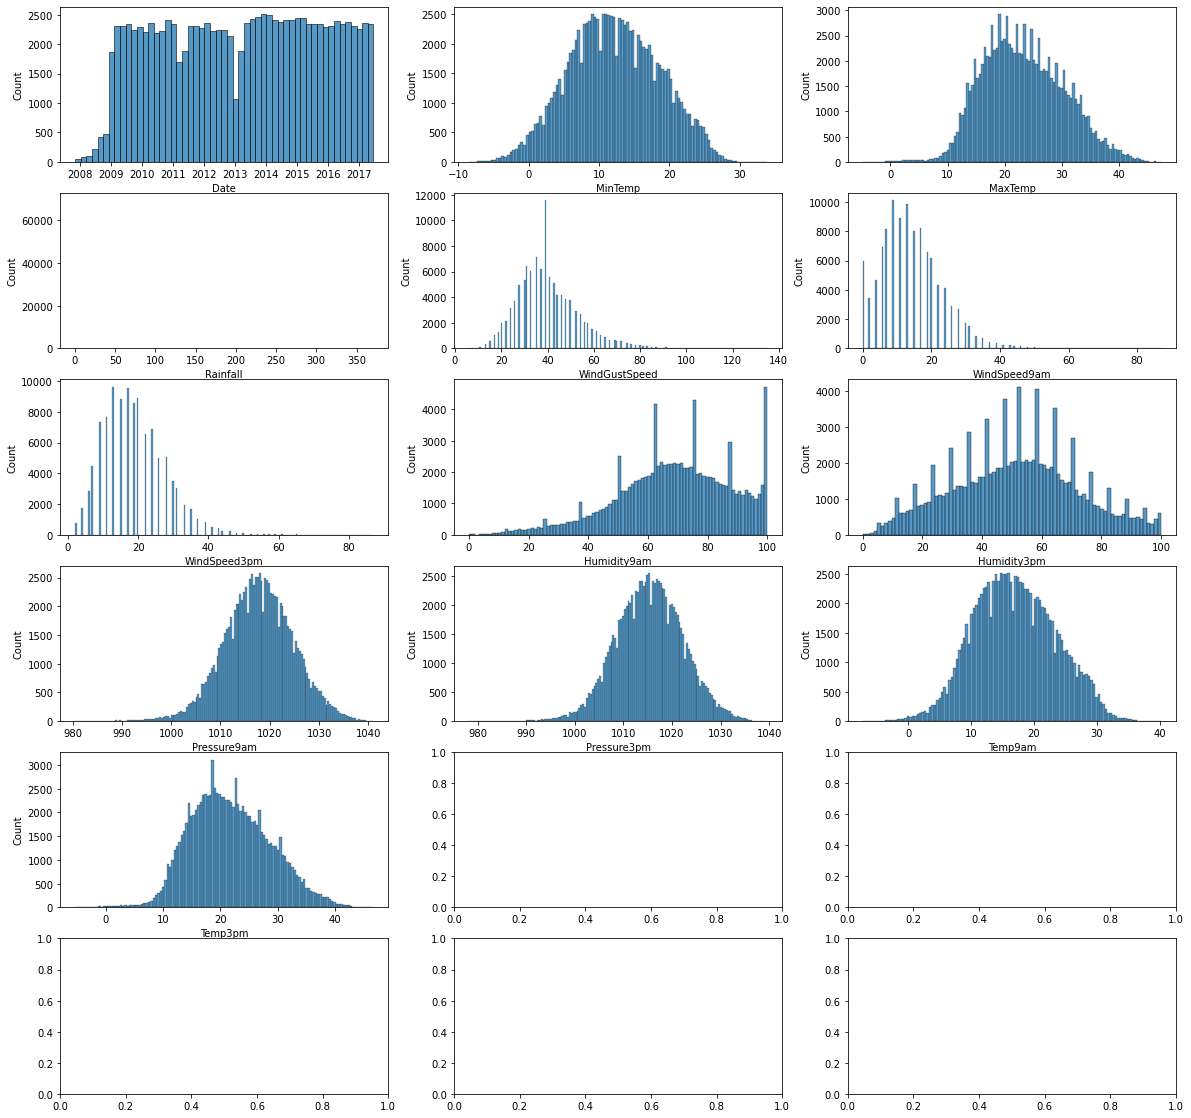

In [433]:
df = train_df.drop(columns=['WindGustDir_imputed', 'WindDir9am_imputed', 'WindGustSpeed_imputed', 'Pressure3pm_imputed','Pressure3pm_imputed', 'Pressure9am_imputed'])
distributionPlots(df, df.select_dtypes(exclude=['category', object]).columns.values)

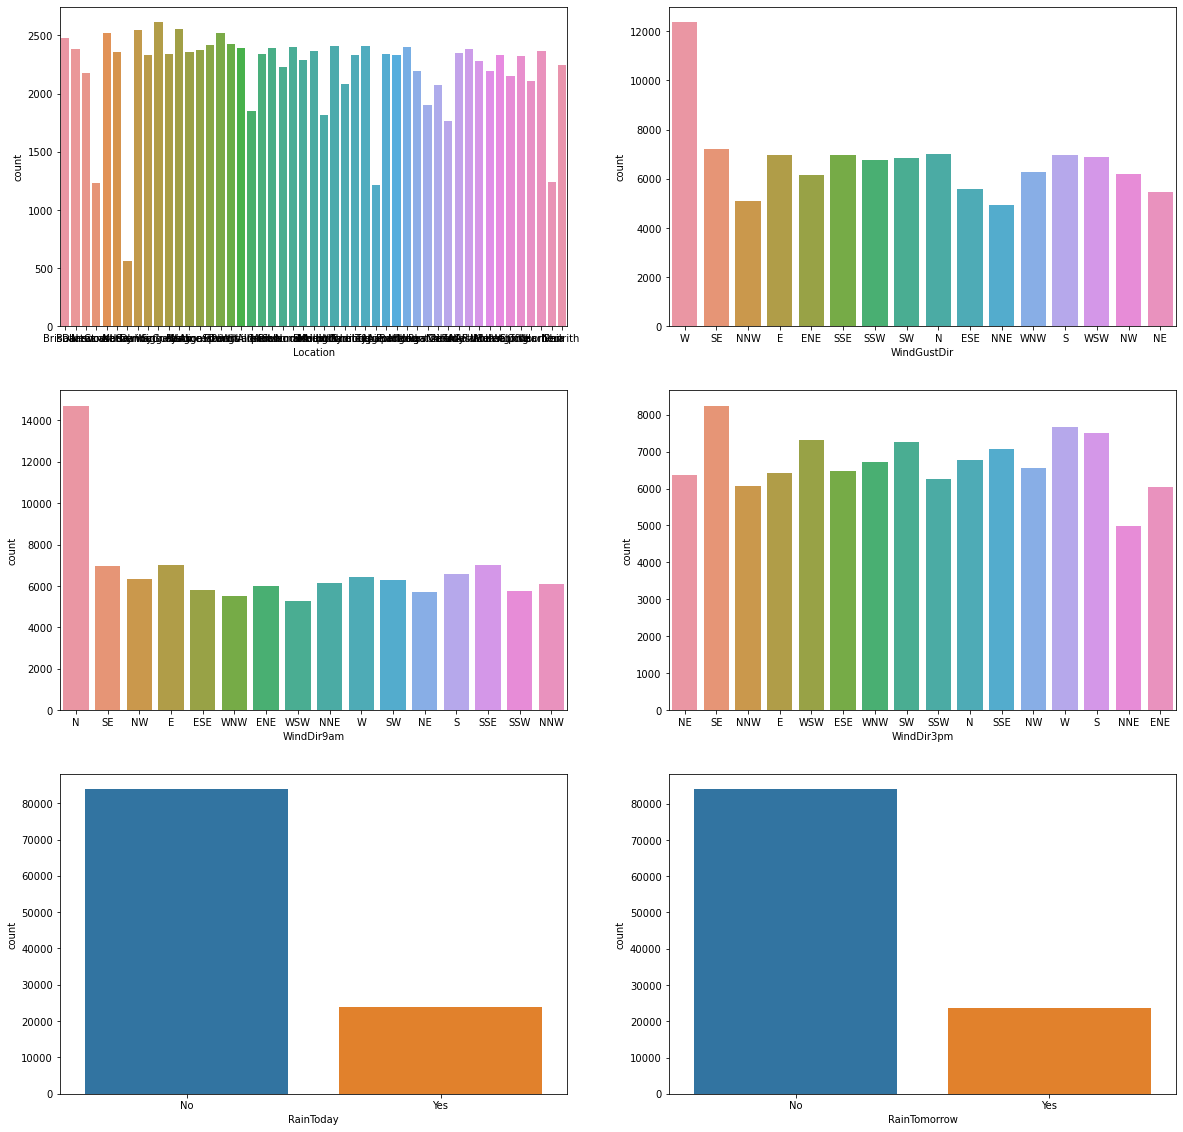

In [434]:
countPlots(df, df.select_dtypes(include=['category', object]).columns.values)


#### Codificacion de variables categoricas

'Date'
para esto dividimos la fecha en year, month, date

In [436]:
train_df.loc[:,'Date_day'] = train_df['Date'].apply(lambda  x: x.day)
train_df.loc[:,'Date_month'] = train_df['Date'].apply(lambda  x: x.month)
train_df.loc[:,'Date_year'] = train_df['Date'].apply(lambda  x: x.year)

'Location'
hacemos label encoding


In [437]:
from sklearn.preprocessing import LabelEncoder

location_le = LabelEncoder()
location_le.fit(train_df['Location'])
len(list(location_le.classes_))

LabelEncoder()

In [440]:
train_df.loc[:, 'Location_le'] = location_le.transform(train_df['Location'])

In [337]:
# one-hot
from sklearn.preprocessing import OneHotEncoder

location_ohe_encoder = OneHotEncoder(categories='auto',
                            drop='first', # first/last=k-1,False = k (OHE)
                            sparse=False # No devolver una matriz esparsa
                            )

location_ohe_encoder.fit(train_df[['Location']].values)
location_ohe_encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object)]

In [349]:
location_ohe_column_names = np.concatenate(location_ohe_encoder.categories_).ravel()
location_ohe_column_names

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

In [336]:
X_train_encoded = location_ohe_encoder.transform(train_df[['Location']])
X_train_encoded.shape

(107619, 48)

In [362]:
location_train_dummy = pd.DataFrame(X_train_encoded,columns=location_ohe_column_names[1::]).astype(int)
location_train_dummy.head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


WindGustDir, WindDir3pm y WindDir9am

Hacemos uns transformacion por sin y cos

In [441]:

# traduccion a grados sexagesimales
windDir_grados = {'E': 0, 'ENE': 22.5, 'NE': 45, 'NNE': 67.5, 'N':90, 'NNW': 112.5, 'NW': 135, 'WNW': 157.5, 'W': 180,
                  'WSW':202.5, 'SW': 225, 'SSW':247.5, 'S':270, 'SSE':292.5, 'SE':315, 'ESE': 337.5}

In [442]:
def sin_wind_dir(wind):
    return np.sin(windDir_grados[wind]*np.pi/180)
def cos_wind_dir(wind):
    return np.cos(windDir_grados[wind]*np.pi/180)

train_df['WindGustDir_sin'] = train_df['WindGustDir'].apply(sin_wind_dir)
train_df['WindGustDir_cos'] = train_df['WindGustDir'].apply(cos_wind_dir)
train_df['WindDir3pm_sin'] = train_df['WindDir3pm'].apply(sin_wind_dir)
train_df['WindDir3pm_cos'] = train_df['WindDir3pm'].apply(cos_wind_dir)
train_df['WindDir9am_sin'] = train_df['WindDir9am'].apply(sin_wind_dir)
train_df['WindDir9am_cos'] = train_df['WindDir9am'].apply(cos_wind_dir)

<AxesSubplot:xlabel='WindGustDir_cos', ylabel='Count'>

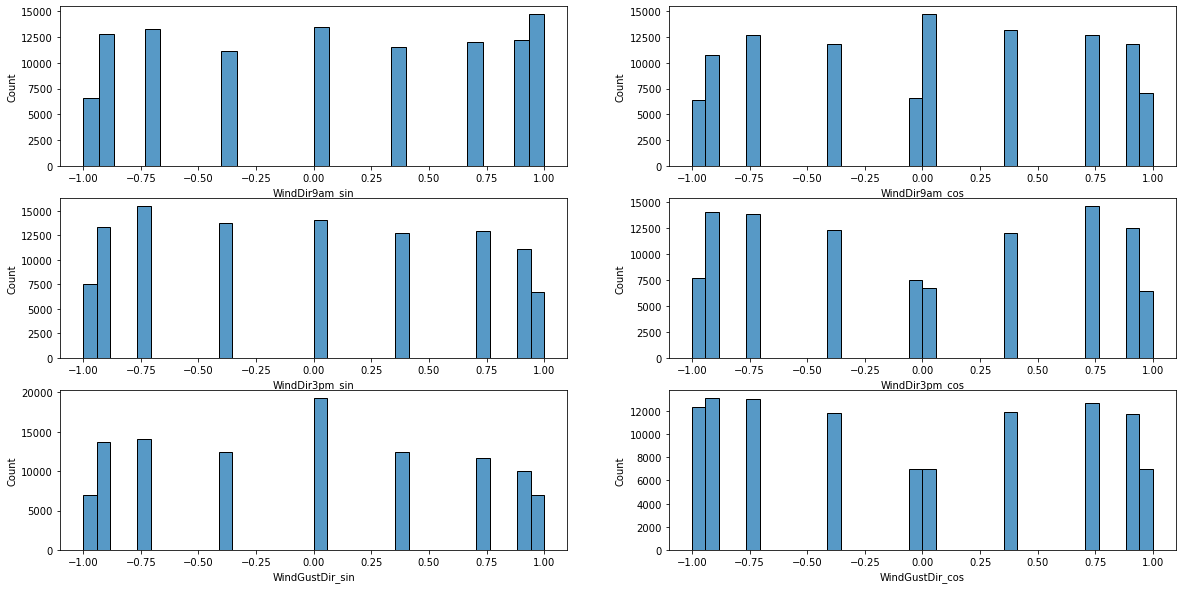

In [444]:
fig, axes =plt.subplots(3,2, figsize=(20,10))
sns.histplot(data = train_df, x= 'WindDir9am_sin', ax=axes[0,0])
sns.histplot(data = train_df, x= 'WindDir9am_cos', ax=axes[0,1])
sns.histplot(data = train_df, x= 'WindDir3pm_sin', ax=axes[1,0])
sns.histplot(data = train_df, x= 'WindDir3pm_cos', ax=axes[1,1])
sns.histplot(data = train_df, x= 'WindGustDir_sin', ax=axes[2,0])
sns.histplot(data = train_df, x= 'WindGustDir_cos', ax=axes[2,1])

'RainToday' y 'RainTomorrow'
ordinal encoding, como solo hay dos clases, conviene reemplazar yes=1 y no=0


In [446]:
train_df.loc[:, 'RainToday_enc'] = train_df['RainToday'].replace(('Yes', 'No'), (1, 0))
train_df.loc[:, 'RainTomorrow_enc'] = train_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

##### Tratamiento de valores extremos
ver que tanto mejora, para las variables continuas

In [788]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

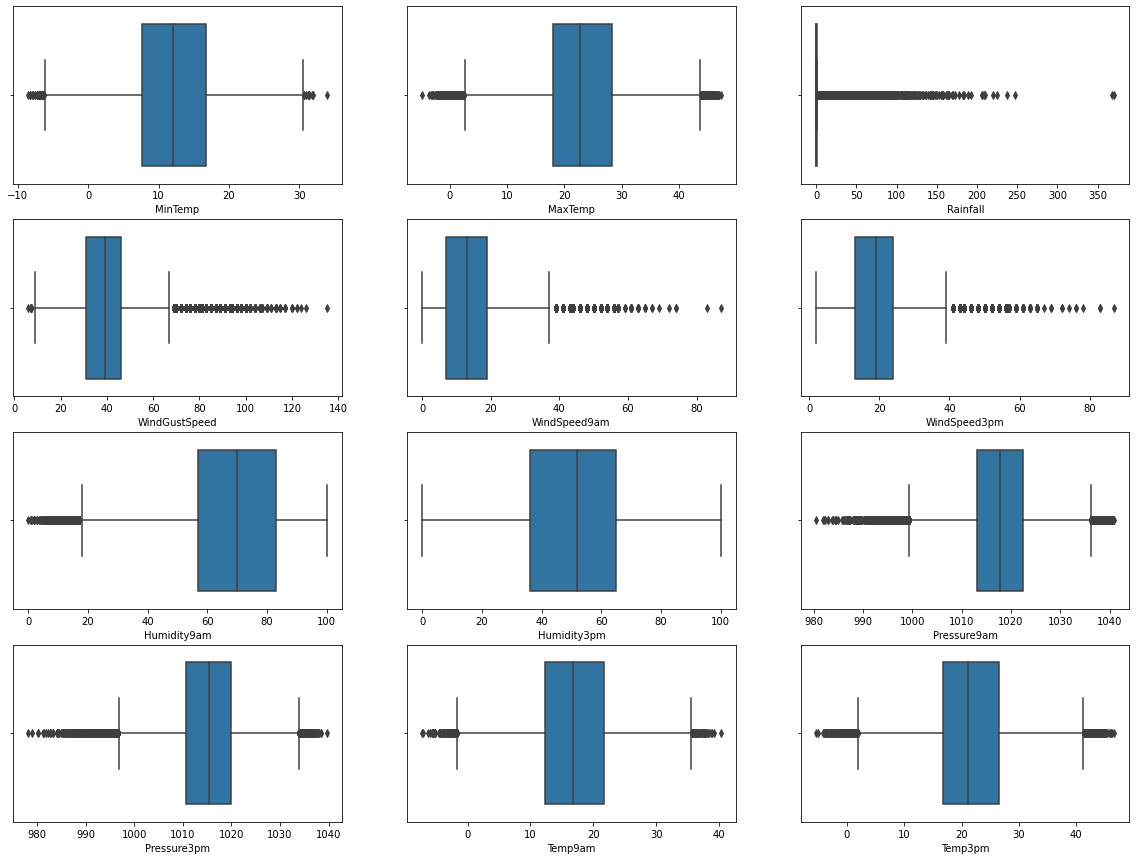

In [792]:
def boxplots(df, columns):
    fig, axes =plt.subplots(4,3, figsize=(20,15))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(columns):
            sns.boxplot(data = df, x = columns[i], ax=ax)
            i+=1

boxplots(train_df, columns)


A simple vista podriamos pensar que 'Rainfall' presenta muchos outliers.

Rainfall
Podríamos intuir que posee muchos outliers

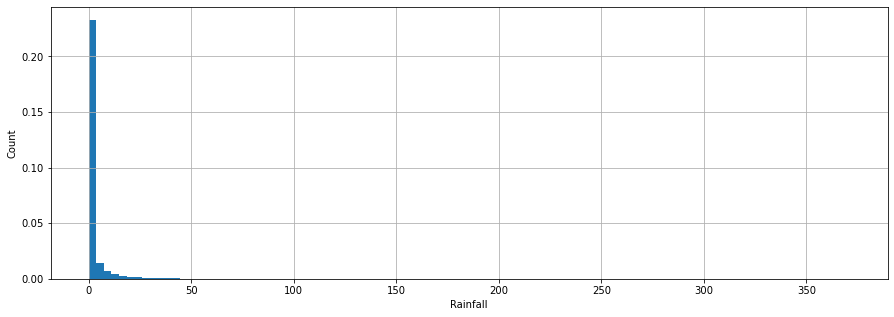

In [793]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
axes.hist(train_df['Rainfall'], bins=100, density=True)
axes.set_xlabel('Rainfall')
axes.set_ylabel('Count')
axes.grid(which='Both')

In [802]:
rainToday_yes = train_df[train_df['RainToday'] == 'Yes']

q1 = rainToday_yes['Rainfall'].quantile(0.25)
q3 = rainToday_yes['Rainfall'].quantile(0.75)
IQR = q3-q1
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR
print(minimum, maximum)
rainToday_yes['Rainfall'].describe()


-11.399999999999999 25.4


count    23877.000000
mean        10.149399
std         15.293455
min          1.100000
25%          2.400000
50%          5.200000
75%         11.600000
max        371.000000
Name: Rainfall, dtype: float64

In [804]:
rainToday_yes[rainToday_yes['Rainfall'] > maximum]['Rainfall'].describe()

count    2051.000000
mean       47.445295
std        29.333786
min        25.600000
25%        30.200000
50%        37.400000
75%        52.800000
max       371.000000
Name: Rainfall, dtype: float64

In [798]:
train_df[train_df['RainToday'] == 'No']['Rainfall'].describe()


count    83830.000000
mean         0.074735
std          0.198780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Rainfall, dtype: float64

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

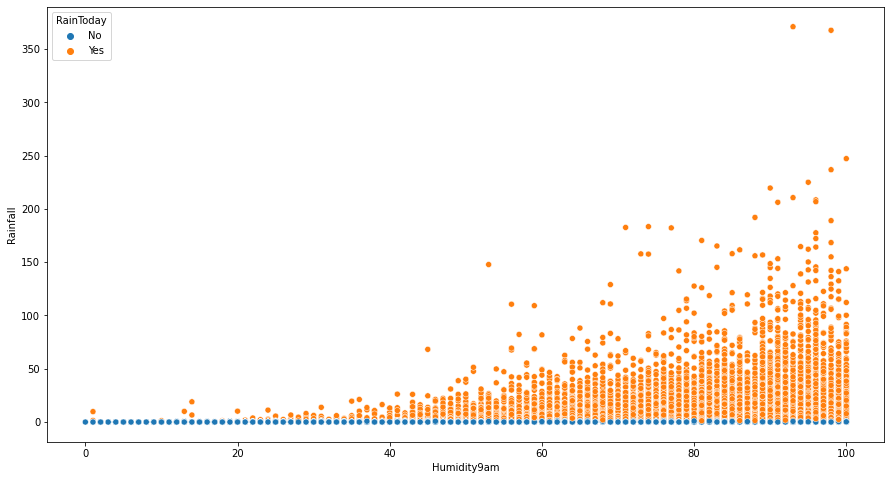

In [809]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(data=train_df, x="Humidity9am", y="Rainfall", hue="RainToday", ax=axes)

No podemos simplemente eliminar los outliers, porque eliminaríamos muchos casos de 'RainToday'=Yes

In [786]:
# funcion de pre-procesamiento:
def pre_processing_1(XY_df):
    XY_result_df = XY_df.copy(deep=True)

    # drop columns with >40% faltantes
    XY_result_df = XY_result_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

    # dropna RainTomorrow, Rainfall y RainToday
    XY_result_df = XY_result_df.dropna(subset=['Rainfall', 'RainToday'])
    XY_result_df = XY_result_df.dropna(subset=['RainTomorrow'])

    # drop nulls < 5%
    XY_result_df = XY_result_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

    # WindGustDir y WindDir9am imputer por moda
    XY_result_df.loc[:, 'WindGustDir_imputed'] = XY_result_df['WindGustDir'].isnull().astype(int)
    XY_result_df.loc[:, 'WindDir9am_imputed'] = XY_result_df['WindDir9am'].isnull().astype(int)
    XY_result_df['WindGustDir'] = XY_result_df['WindGustDir'].fillna(moda_WindGustDir)
    XY_result_df['WindDir9am'] = XY_result_df['WindDir9am'].fillna(moda_WindDir9am)

    # WindGustSpeed imputer por median
    XY_result_df.loc[:, 'WindGustSpeed_imputed'] = XY_result_df['WindGustSpeed'].isnull().astype(int)
    XY_result_df['WindGustSpeed'] = XY_result_df['WindGustSpeed'].fillna(median_WindGustSpeed)

    # kNN imputer Pressure3pm y Pressure9am
    XY_result_df.loc[:, 'Pressure3pm_imputed'] = XY_result_df['Pressure3pm'].isnull().astype(int)
    XY_result_df.loc[:, 'Pressure9am_imputed'] = XY_result_df['Pressure9am'].isnull().astype(int)

    XY_result_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
    XY_result_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]

    # Date encoding
    XY_result_df.loc[:,'Date_day'] = XY_result_df['Date'].apply(lambda  x: x.day)
    XY_result_df.loc[:,'Date_month'] = XY_result_df['Date'].apply(lambda  x: x.month)
    XY_result_df.loc[:,'Date_year'] = XY_result_df['Date'].apply(lambda  x: x.year)

    # Location encoding
    XY_result_df.loc[:, 'Location_le'] = location_le.transform(XY_result_df['Location'])

    # wind direction encoding
    XY_result_df['WindGustDir_sin'] = XY_result_df['WindGustDir'].apply(sin_wind_dir)
    XY_result_df['WindGustDir_cos'] = XY_result_df['WindGustDir'].apply(cos_wind_dir)
    XY_result_df['WindDir3pm_sin'] = XY_result_df['WindDir3pm'].apply(sin_wind_dir)
    XY_result_df['WindDir3pm_cos'] = XY_result_df['WindDir3pm'].apply(cos_wind_dir)
    XY_result_df['WindDir9am_sin'] = XY_result_df['WindDir9am'].apply(sin_wind_dir)
    XY_result_df['WindDir9am_cos'] = XY_result_df['WindDir9am'].apply(cos_wind_dir)

    # rainToday, rainTomorrow encoding
    XY_result_df.loc[:, 'RainToday_enc'] = XY_result_df['RainToday'].replace(('Yes', 'No'), (1, 0))
    XY_result_df.loc[:, 'RainTomorrow_enc'] = XY_result_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

    return XY_result_df


#### Seleccion de features

In [524]:
XY_train_df = train_df[['Location_le', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Date_day', 'Date_month', 'Date_year', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindGustDir_sin', 'WindGustDir_cos', 'RainToday_enc', 'RainTomorrow_enc']]

numeric_continuos_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

numeric_discrete_columns = ['Location_le', 'Date_day', 'Date_month', 'Date_year', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindGustDir_sin', 'WindGustDir_cos', 'RainToday_enc']

target_column=['RainTomorrow_enc']

X_train_df = train_df[['Location_le', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Date_day', 'Date_month', 'Date_year', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindGustDir_sin', 'WindGustDir_cos', 'RainToday_enc']]

y_train_df = train_df[target_column]

In [785]:
from scipy import stats

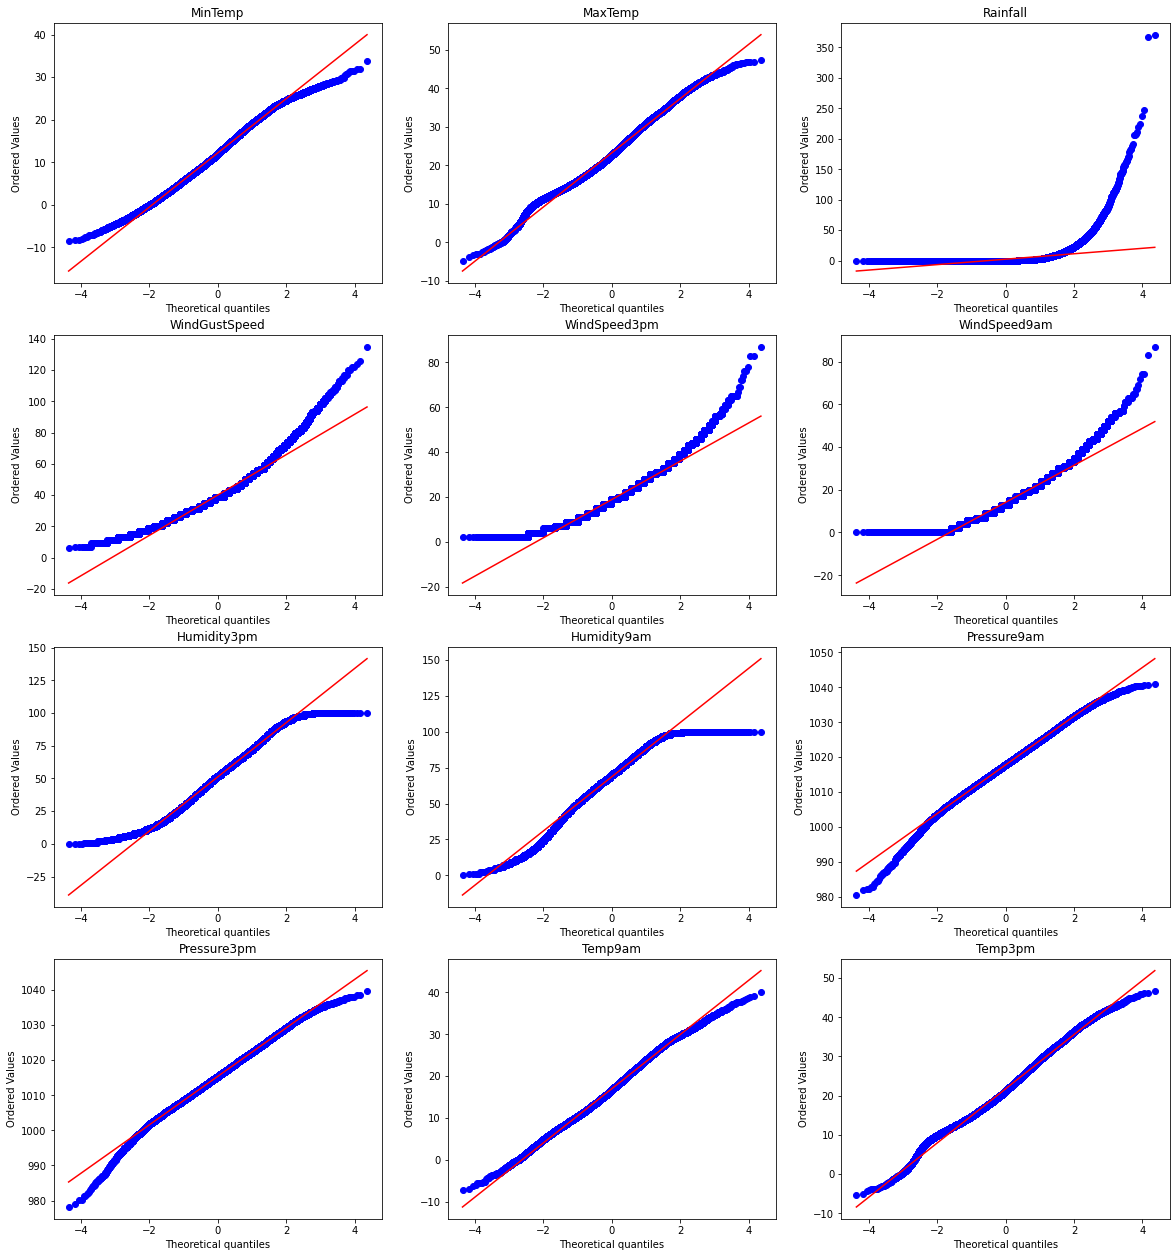

In [461]:
def qqPlots(df, numeric_columns):
    fig, axes =plt.subplots(4,3, figsize=(20,22))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            stats.probplot(df[numeric_columns[i]], dist="norm", plot=ax)
            ax.set_title(numeric_columns[i])
            i+=1

qqPlots(XY_train_df, numeric_continuos_columns)

MinTemp, MaxTemp, Pressure9am,  Pressure3pm, Temp9am y Temp3pm se asemejan mas a una normal.


#### Correlacion pearson/spearman

In [463]:
normal_columns = ['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

<AxesSubplot:>

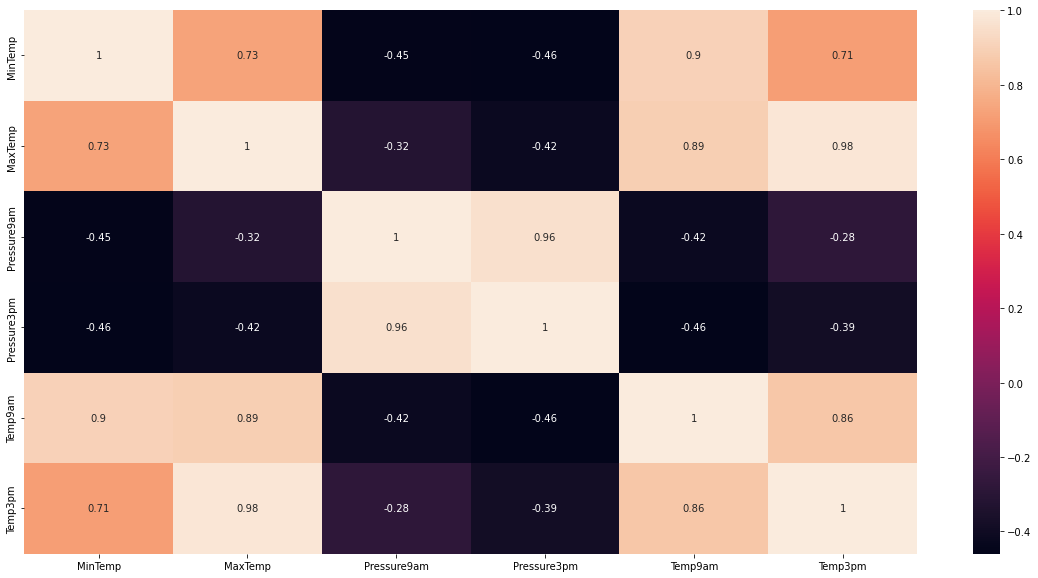

In [464]:
# correlacion pearson
correlation_matrix = XY_train_df[normal_columns].corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

<AxesSubplot:>

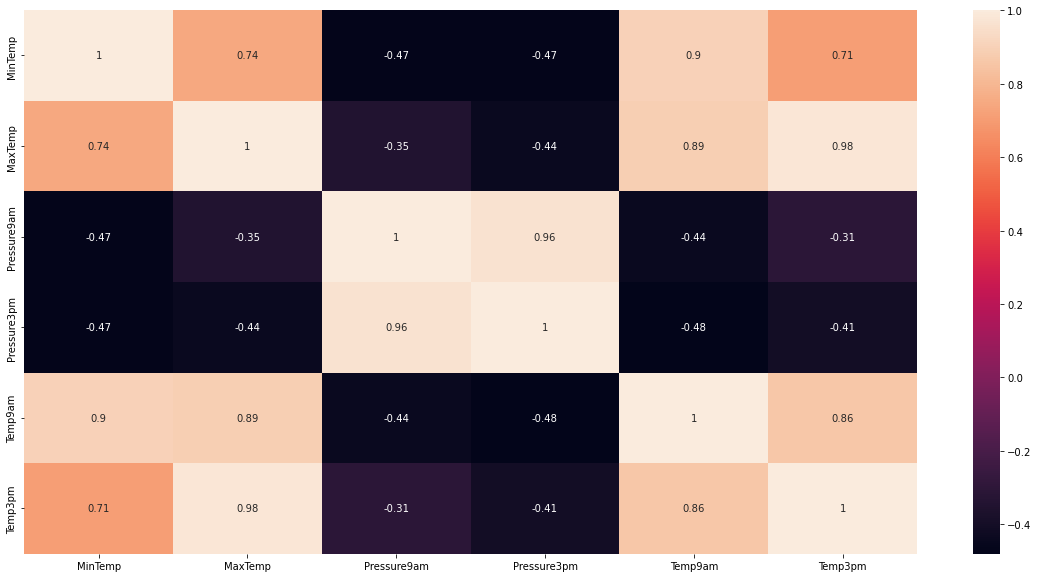

In [468]:
# correlacion spearman
correlation_matrix = XY_train_df[normal_columns].corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

Podemos ver que MinTemp, MaxTemp, Temp9am, Temp3pm, MaxTemp están altamente correlacionadas (Podemos escoger la que mejor relacion tenga con la salida)
podemos ver que Pressure9am y Pressure3pm están altamente correlacionadas

<AxesSubplot:>

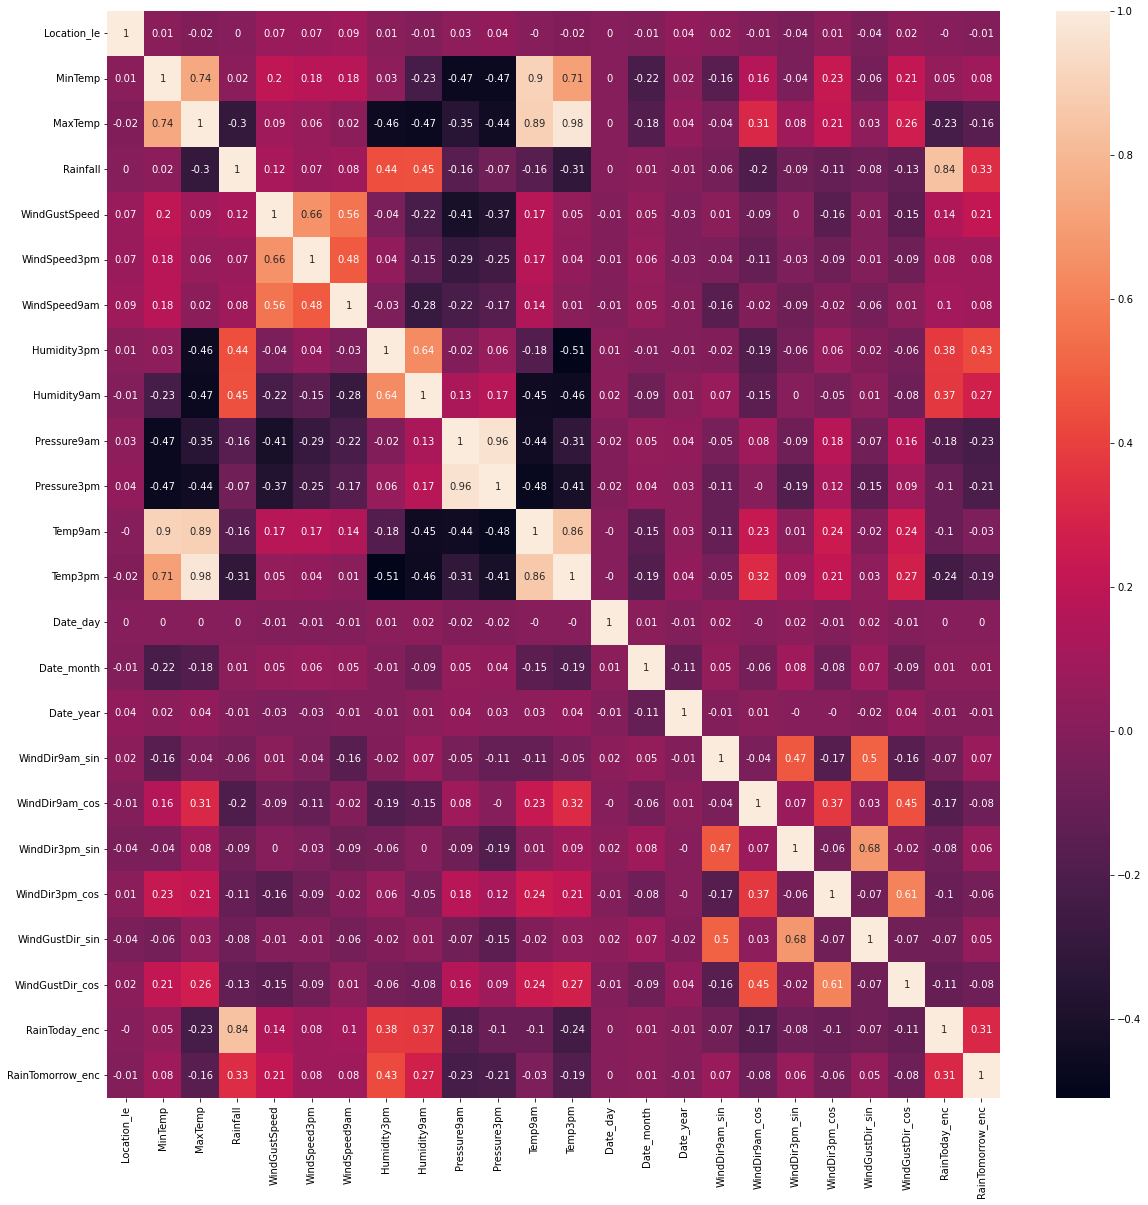

In [530]:
correlation_matrix = XY_train_df.corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

#### Informacion Mutua¶

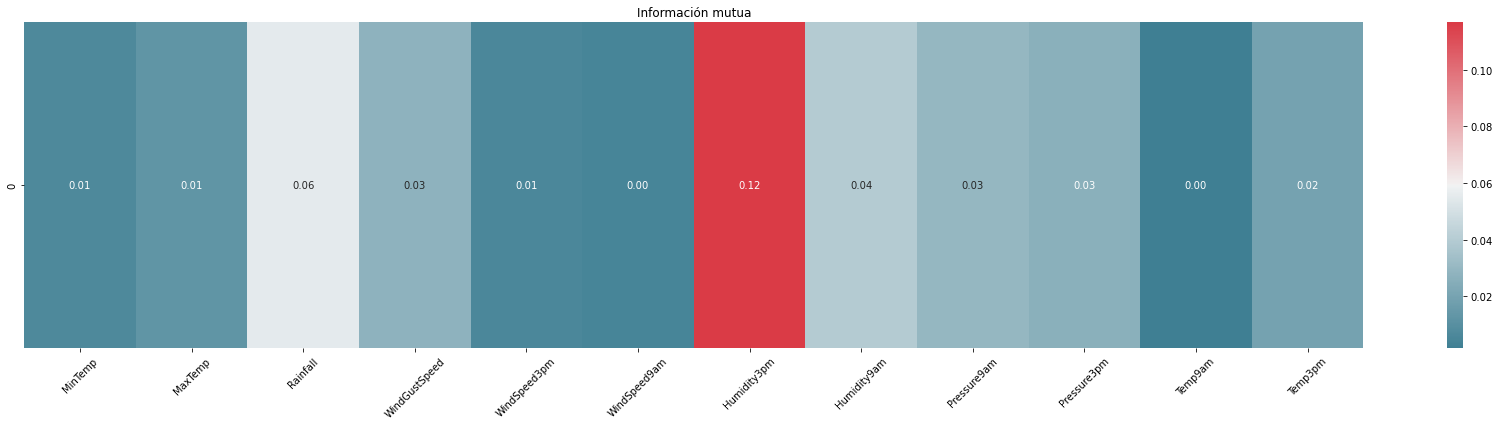

In [492]:
# informacion mutua
from sklearn.feature_selection import mutual_info_classif

MI = mutual_info_classif(X_train_df[numeric_continuos_columns], y_train_df['RainTomorrow_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(30,6))
ax.set_title('Información mutua')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_continuos_columns)
ax.tick_params(axis='x', rotation=45)

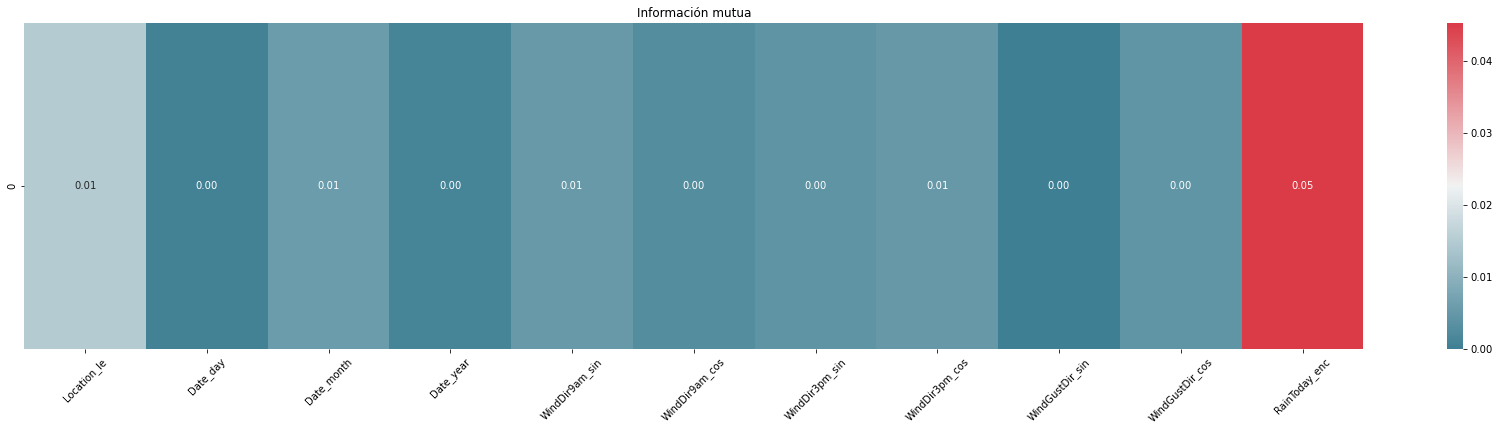

In [512]:
MI = mutual_info_classif(X_train_df[numeric_discrete_columns], y_train_df['RainTomorrow_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(30,6))
ax.set_title('Información mutua')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_discrete_columns)
ax.tick_params(axis='x', rotation=45)

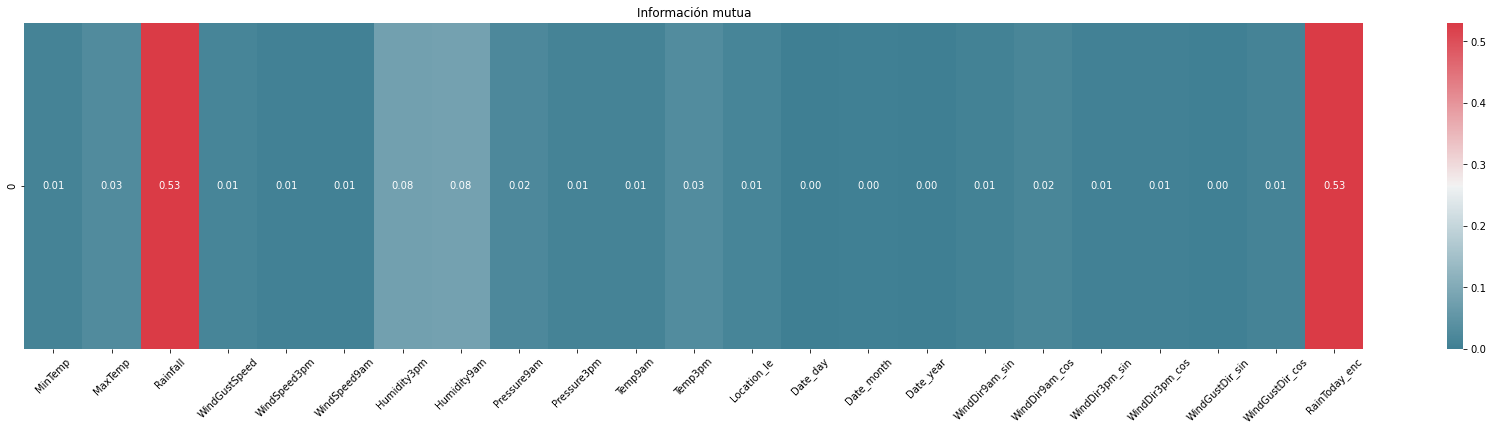

In [519]:
MI = mutual_info_classif(X_train_df[numeric_continuos_columns + numeric_discrete_columns], X_train_df['RainToday_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(30,6))
ax.set_title('Información mutua')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_continuos_columns + numeric_discrete_columns)
ax.tick_params(axis='x', rotation=45)

Suponemos que los datos metereológicos del dia de hoy tienen una relacion con 'RainToday'.
Como se observa 'Rainfall' y 'RainToday' tienen dependencia.

Nos quedamos con las siguientes variables

In [546]:
X_train = X_train_df[['Date_month', 'WindDir9am_sin', 'WindDir9am_cos', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']]
y_train = y_train_df

### 4. Entrenamiento de modelos

In [773]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [777]:
X_train.head(5)

,Date_month,WindDir9am_sin,WindDir9am_cos,WindGustSpeed,Humidity3pm,Temp3pm,Pressure9am,Rainfall
85484,8,1.000000,6.123234e-17,39.0,47.0,24.3,1019.000000,0.0
57755,6,-0.707107,7.071068e-01,35.0,95.0,12.4,1016.800000,5.2
82990,9,1.000000,6.123234e-17,20.0,67.0,15.0,1026.000000,0.0
15170,3,0.707107,-7.071068e-01,39.0,37.0,22.8,1019.066667,0.0
47432,1,0.000000,1.000000e+00,37.0,52.0,23.9,1011.800000,0.0


In [701]:
y_train.head(5)

,RainTomorrow_enc
85484,0
57755,1
82990,0
15170,0
47432,0


In [775]:
# Proporcion de las clases en K-Fold
skf = StratifiedKFold(n_splits=5)

# revisamos si mantenemos las etiquetas tanto en train y validation
for train_index, test_index in skf.split(X_train.values, y_train.values):
    print(y_train.iloc[train_index, :].value_counts().to_numpy()/len(train_index))
    print(y_train.iloc[test_index, :].value_counts().to_numpy()/len(test_index))

[0.7796321 0.2203679]
[0.77963977 0.22036023]
[0.7796321 0.2203679]
[0.77963977 0.22036023]
[0.77963466 0.22036534]
[0.77962954 0.22037046]
[0.77963466 0.22036534]
[0.77962954 0.22037046]
[0.77963466 0.22036534]
[0.77962954 0.22037046]


### Logistic Regression

In [774]:
#scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [778]:
class LogisticRegressionNumpy(object):

    def __init__(self):
        self.w = None

    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """
    def fit(self, X=None, y=None, lr=0.01, epochs=100, b=16, gradient='SGD'):

        X_expanded = np.hstack((np.ones((len(X),1)),X))

        if gradient == 'MINI':
            h, w = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.w = w
            return h, w

    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        pred = self.sigmoid(np.dot(X_expanded, self.w))
        return np.array([1 if i >= 0.5 else 0 for i in pred])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def bce(self, X, y, theta):
        h = self.sigmoid(np.dot(X, theta))
        return (1 / len(y)) * ((np.dot((-y).T, np.log(h))) - (np.dot((1 - y).T, np.log(1 - h))))

    # definimos la función loss para reportarla cada cierta cantidad de epochs
    def loss(self, y, y_hat):
        loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss


    def mini_batch_gradient_descent(self, X, y, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = X.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)
        hist_cos = np.zeros((amt_epochs, 1))
        # iterate over the n_epochs
        for j in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)

            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Update the weights
                #W = W - (lr / batch_size) * np.dot(batch_X.T, (self.sigmoid(np.dot(batch_X, W)) - batch_y))

                prediction = self.sigmoid(np.sum(np.transpose(W) * batch_X, axis=1))
                error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
                grad_sum = np.sum(error * batch_X, axis=0)
                grad_mul = 1 / batch_size * grad_sum
                gradient = np.transpose(grad_mul).reshape(-1, 1)

                W = W - (lr * gradient)

            hist_cos[j] = self.loss(y_train, self.sigmoid(np.dot(X_train, W)))
            #hist_cos[j] = self.bce(X_train, y_train, W)

        return hist_cos, W


class BaseMetric:
    def __init__(self, **kwargs):
        self.parameters = kwargs

    def __call__(self, *args, **kwargs):
        pass


class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n


class Accuracy(Metric):
    def __call__(self, target, prediction):
        return np.mean(target == prediction, axis=0)


class Precision(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FP)


class Recall(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FN)

In [781]:
# K-folds, metrica F1-score
def k_folds(X, y, lr, b, epochs):
    f1score_list = []
    log_reg = LogisticRegressionNumpy()
    for train_index, test_index in skf.split(X, y):
        #scale
        X_train_scaled = scaler.transform(X[train_index])
        X_val_scaled = scaler.transform(X[test_index])

        #fit
        log_reg.fit(X=X_train_scaled, y=y[train_index], lr=lr, epochs=epochs, b=b, gradient='MINI')

        # metric
        y_val_predict = log_reg.predict(X_val_scaled)
        metrics_list = [Accuracy(), Precision(), Recall()]
        metrics = [metric(y[test_index].ravel(), y_val_predict.ravel()) for metric in metrics_list]
        F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
        f1score_list.append(F1)
    return np.mean(f1score_list)


In [782]:
# seleccion de hiperparametros con clases propias
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_22532/2550792353.py:37: RuntimeWarning: invalid

{'lr': 0.05, 'epochs': 100, 'batch_size': 32}

In [783]:
# best parameter
print({'lr': 0.05, 'epochs': 100, 'batch_size': 32})

{'lr': 0.05, 'epochs': 100, 'batch_size': 32}


In [784]:
log_reg = LogisticRegressionNumpy()
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

h, w = log_reg.fit(X=X_train_scaled, y=y_train_1.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')
y_val_predict = log_reg.predict(X_val_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_val_1.ravel(), y_val_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))


Accuracy: 0.8425401541175378
Precision: 0.7209762532981531
Recall: 0.4619611158072697
F1-score: 0.5631117980422463


In [ ]:
# predict Test


Text(0, 0.5, 'J(Funcion de costo)')

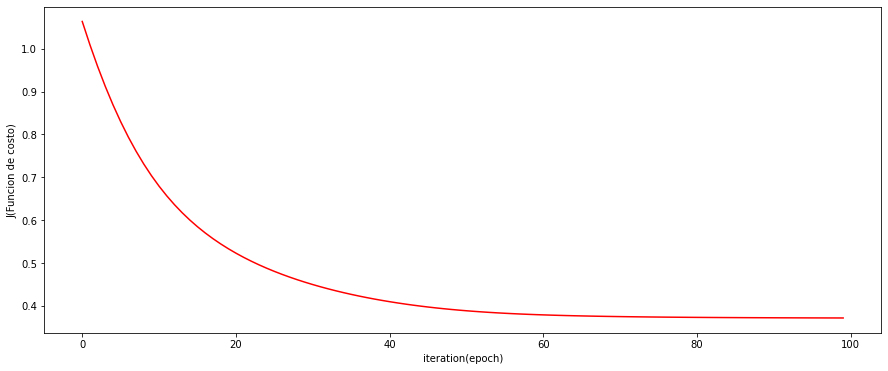

In [706]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.plot(range(len(h)), h, 'r')
axes.set_xlabel("iteration(epoch)")
axes.set_ylabel("J(Funcion de costo)")

In [758]:

grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

X_train_scaled = scaler.transform(X_train.values)

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('mejor F1-Score {} hyper-paramaters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


mejor F1-Score 0.5569175099043684 hyper-paramaters {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [760]:
#sklearn
from sklearn.linear_model import LogisticRegression
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train.values, y_train.values, test_size=0.2)
X_train_scaled = scaler.transform(X_train_1)
X_val_scaled = scaler.transform(X_val_1)

clf = LogisticRegression(C=1, penalty='l2', fit_intercept=True, solver='liblinear', max_iter=100)
clf.fit(X_train_scaled, y_train_1.ravel())

y_val_predict = clf.predict(X_val_scaled)


In [770]:
metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_val_1.ravel(), y_val_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))


Accuracy: 0.8426329960077987
Precision: 0.7041284403669725
Recall: 0.46354616048317515
F1-score: 0.5590530697190427


In [767]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#f1_score(y_val_1.ravel(), y_val_predict.ravel(), average='samples')
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 1, 0, 0, 1]

precision = Precision()
recall = Recall()
p = precision(np.array(y_true), np.array(y_pred))
r = recall(np.array(y_true), np.array(y_pred))
F1 = 2 * (p * r) / (p + r)
print('Precision: {}'.format(p))
print('Recall: {}'.format(r))
print('F1-score: {}'.format(F1))

#precision = TP / (TP + FP)
#recall = TP / (TP + FN)
f1_score(y_true, y_pred, average=None)

Precision: 0.3333333333333333
Recall: 0.5
F1-score: 0.4


array([0.57142857, 0.4       ])

In [740]:
roc_auc_score(y_val_1.ravel(), clf.predict_proba(X_val_scaled)[:, 1])

0.8453366032583008

KNN Classifier,

In [545]:
from sklearn.model_selection import GridSearchCV
knn_params = {'leaf_size':[1,5] ,'n_neighbors':[5,3], 'p':[1,2], 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV (knn, knn_params, scoring='roc_auc', cv=5)
grid_knn.fit(X_train,y_train['RainTomorrow_enc'].to_numpy())

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_knn.best_score_,
                                                                                grid_knn.best_params_))

KeyboardInterrupt: 

### 5. Evaluación de resultados y conclusiones

### 6. Presentación de resultados